<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [10]:
!curl 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.names'

1. Title: 1984 United States Congressional Voting Records Database

2. Source Information:
    (a) Source:  Congressional Quarterly Almanac, 98th Congress, 
                 2nd session 1984, Volume XL: Congressional Quarterly Inc. 
                 Washington, D.C., 1985.
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987 

3. Past Usage
   - Publications
     1. Schlimmer, J. C. (1987).  Concept acquisition through 
        representational adjustment.  Doctoral dissertation, Department of 
        Information and Computer Science, University of California, Irvine, CA.
        -- Results: about 90%-95% accuracy appears to be STAGGER's asymptote
     - Predicted attribute: party affiliation (2 classes)

4. Relevant Information:
      This data set includes votes for each of the U.S. House of
      Representatives Congressmen on the 16 key votes identified by the
      CQA.  The CQA lists nine different types of votes: voted for, paired
      

In [0]:
columns = ['party',
           'handicapped-infants',
           'water-project-cost-sharing',
           'adoption-of-the-budget-resolution',
           'physician-fee-freeze', 
           'el-salvador-aid', 
           'religious-groups-in-schools', 
           'anti-satellite-test-ban', 
           'aid-to-nicaraguan-contras', 
           'mx-missile',
           'immigration',
           'synfuels-corporation-cutback', 
           'education-spending', 
           'superfund-right-to-sue',
           'crime', 
           'duty-free-exports',
           'export-administration-act-south-africa']

In [12]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
                 header=None, 
                 names=columns, 
                 na_values='?')   #Replace ? with NaN
                                  #Or can do: df.replace('?', np.NaN, inplace = True)
                        
                 
df.shape

(435, 17)

In [13]:
df.head(3)

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n


In [14]:
df.isna().sum()

party                                       0
handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
dtype: int64

In [15]:
#Example of nan's for a particular feature
df['adoption-of-the-budget-resolution'].value_counts(dropna=False)

y      253
n      171
NaN     11
Name: adoption-of-the-budget-resolution, dtype: int64

In [16]:
#Party is either dem or rep
df['party'].value_counts(dropna=False)

democrat      267
republican    168
Name: party, dtype: int64

In [0]:
df.replace(['n','y'],[0,1],inplace=True)

-1.7374703659666726 0.0831850890724546


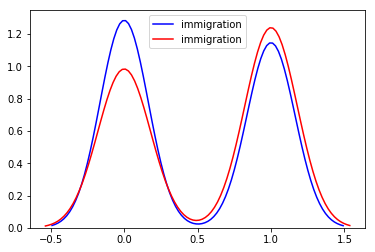

In [55]:
#Test example of rep vs dem support on one issue (in this case, immigration)
immigration_dem = df[df['party']=='democrat']['immigration'].dropna()
immigration_rep = df[df['party']=='republican']['immigration'].dropna()

statistic, pvalue = ttest_ind(immigration_dem, immigration_rep,equal_var=False)
print(statistic, pvalue)

sns.kdeplot(immigration_dem, color='blue');
sns.kdeplot(immigration_rep, color='red');

In [0]:
#Generalize into a function
def compare_party_vote(issue):
  dem = df[df['party']=='democrat'][issue].dropna()
  rep = df[df['party']=='republican'][issue].dropna()
  
  statistic, pvalue = ttest_ind(dem, rep, equal_var=False)
  
  sns.kdeplot(dem, color='blue');
  sns.kdeplot(rep, color='red');
  
  return statistic,pvalue

(-10.767024944451316, 4.830931857697404e-24)

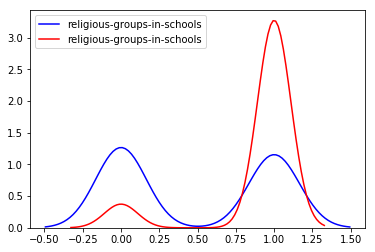

In [79]:
#Strong republican support for 'religious-groups-in-schools' in which p<<0.5
#  so that we may reject null hypothesis that parties vote the same

compare_party_vote('religious-groups-in-schools')

(-20.724815686746847, 3.5687507663396274e-62)

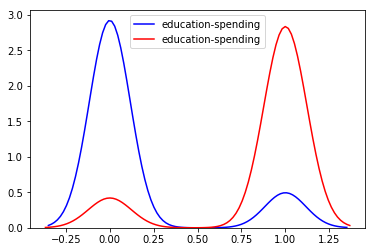

In [80]:
#Strong democratic support for 'education-spending' in which p<<0.5
#  so that we may reject null hypothesis that parties vote the same

compare_party_vote('education-spending')

In [112]:
#Loop over voting records to find where voting is non-partisan (pvalue>.1)

itercolumns = iter(columns)
next(itercolumns)
for feature in itercolumns:
  statistic, pvalue = compare_party_vote(feature)
  plt.close()
  
  if pvalue>0.1:
    print("Voting on", feature, "is non-partisan. ", "(pvalue =", f'{pvalue:.3}' + ")")
                                                                            

Voting on water-project-cost-sharing is non-partisan.  (pvalue = 0.929)
